In [1]:
pip install underthesea

  Obtaining dependency information for underthesea from https://files.pythonhosted.org/packages/c0/26/a2615fb23899ec747eaf7d7b3d4ae6b1959b71ae2a8546e121a8ce375d9c/underthesea-6.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for Click>=6.0 from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for python-crfsuite>=0.9.6 from https://files.pythonhosted.org/packages/22/28/141f6a0f053bbe999d7f905cc9f126e29541986dee14a91078d14e45c97b/python_crfsuite-0.9.10-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/a6/0a/0d20d2c0f16be91b9fa32a77b76c60f9baf6eba419e5ef5deca17af9c582/nltk-3.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/18/eb/fdb7eb9e48b7b02554e1664afd3bd3f117f6b6d6c5881438a0b055554f9b/tqdm-4.66.4-

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 248, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\commands\install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from underthesea import *
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/sample_data/Chăm-Sóc-Thú-Cưng.csv')
print(df.shape)
df.head()

(261525, 7)


,itemid,product_name,cmtid,author_username,time,comment,rating
0,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14717091792,nguynthidng536,2024-03-30 16:38:01,Chất lượng sản phẩm:đắng không nên mua\n\nShip...,1
1,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14131482796,dinh_trong_hiep,2024-03-17 17:15:33,"Gửi thiếu hàng, đặt xx giao súp thưởng, mình m...",1
2,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14278751782,mtl6camz1u,2024-03-09 00:54:24,Chất lượng sản phẩm:rất tệ\nĐúng với mô tả:khô...,1
3,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14629947189,the_repus,2024-03-24 07:23:08,"Đặt xúc xích mà ship cái qq này, đã v còn hết ...",1
4,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14879826473,ng.anh_1982,2024-04-15 07:36:43,"Shop làm ăn bố láo, như quần què đặt 45 cây gi...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261525 entries, 0 to 261524
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   itemid           261525 non-null  int64 
 1   product_name     261525 non-null  object
 2   cmtid            261525 non-null  int64 
 3   author_username  258653 non-null  object
 4   time             261525 non-null  object
 5   comment          261471 non-null  object
 6   rating           261525 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 14.0+ MB


In [ ]:
df.isnull().sum()

itemid                0
product_name          0
cmtid                 0
author_username    2872
time                  0
comment              54
rating                0
dtype: int64

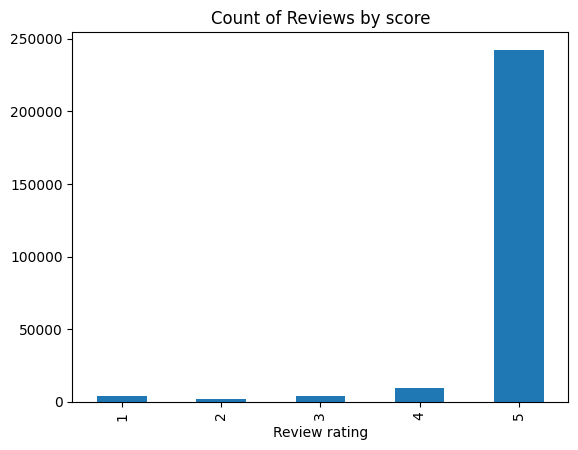

In [ ]:
# prompt: count the amount of each value in rating column

ax = df['rating'].value_counts().sort_index() \
  .plot(kind="bar",
        title="Count of Reviews by score")
ax.set_xlabel('Review rating')
plt.show()

In [ ]:
df.shape

(261525, 7)

## Basic NLTK

In [ ]:
# prompt: write code to get all rows which product_name's value = "[HÀNG SẴN - GIAO NHANH 2H]"
example = df['comment'][0]
print(example)
print(word_tokenize(example))
tagged = pos_tag(example)
print(tagged[:10])
entities = chunk(example)
print(entities)
classify(example)

Chất lượng sản phẩm:đắng không nên mua

Shipper thân thiện nhưng xúc xích đắng chả ăn đc
['Chất lượng', 'sản phẩm', ':', 'đắng', 'không', 'nên', 'mua', 'Shipper', 'thân thiện', 'nhưng', 'xúc xích', 'đắng', 'chả', 'ăn', 'đc']
[('Chất lượng', 'N'), ('sản phẩm', 'N'), (':', 'CH'), ('đắng', 'A'), ('không', 'R'), ('nên', 'V'), ('mua', 'V'), ('Shipper', 'Np'), ('thân thiện', 'V'), ('nhưng', 'C')]
[('Chất lượng', 'N', 'B-NP'), ('sản phẩm', 'N', 'B-NP'), (':', 'CH', 'O'), ('đắng', 'A', 'B-AP'), ('không', 'R', 'O'), ('nên', 'V', 'B-VP'), ('mua', 'V', 'B-VP'), ('Shipper', 'Np', 'B-NP'), ('thân thiện', 'V', 'B-VP'), ('nhưng', 'C', 'O'), ('xúc xích', 'N', 'B-NP'), ('đắng', 'A', 'B-AP'), ('chả', 'R', 'O'), ('ăn', 'V', 'B-VP'), ('đc', 'M', 'B-NP')]
2024-05-12 10:42:40,867 https://github.com/undertheseanlp/playground/releases/download/1.3.x/tc_svm_vntc_20201228.zip not found in cache, downloading to /tmp/tmp54s_i6c9


100%|██████████| 75578053/75578053 [00:01<00:00, 43587248.38B/s]

2024-05-12 10:42:43,260 copying /tmp/tmp54s_i6c9 to cache at /root/.underthesea/models/tc_svm_vntc_20201228.zip


2024-05-12 10:42:43,468 removing temp file /tmp/tmp54s_i6c9


KeyboardInterrupt: 

## Data cleaning and preprocessing


**Remove duplicated comments**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261525 entries, 0 to 261524
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   itemid           261525 non-null  int64 
 1   product_name     261525 non-null  object
 2   cmtid            261525 non-null  int64 
 3   author_username  258653 non-null  object
 4   time             261525 non-null  object
 5   comment          261471 non-null  object
 6   rating           261525 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 14.0+ MB


In [ ]:
#Count duplicated comment
duplicated_fields = ['itemid','author_username', 'time', 'comment']
df[df.duplicated(duplicated_fields)].shape


(24869, 7)

In [ ]:
# prompt: group rows by itemid
df.drop_duplicates(duplicated_fields, inplace=True)

In [ ]:
#Reindex dataframe
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(236656, 7)

In [ ]:
#Count duplicated comment
duplicated_fields = ['itemid','author_username', 'time', 'comment']
df[df.duplicated(duplicated_fields)].shape


(0, 7)

In [ ]:
df['author_username'].fillna('No username provided', inplace=True)

In [ ]:
# prompt: delete rows having comment null

df.dropna(subset=['comment'], inplace=True)


In [ ]:
#Check comments for each score
df['rating'].value_counts().sort_index()

rating
1      3542
2      1688
3      3875
4      8856
5    218654
Name: count, dtype: int64

In [ ]:
# Rename the columns to lowercase and use underscores
df.rename(columns={'itemid': 'item_id',
                        'cmtid': 'cmt_id'},
              inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236615 entries, 0 to 236655
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   item_id          236615 non-null  int64 
 1   product_name     236615 non-null  object
 2   cmt_id           236615 non-null  int64 
 3   author_username  236615 non-null  object
 4   time             236615 non-null  object
 5   comment          236615 non-null  object
 6   rating           236615 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 14.4+ MB


**Create a target variable**
The goal is to classify positive and negative app reviews. Negative reviews can reveal critical features that are missing from Shopee's app or even bring to light the presence of bugs on the app. This will require immediate action from Shopee. As such, priority will be placed on the prediction of negative sentiment. We will assign the negative reviews (scores 1-3) to class 1, and the positive reviews (scores 4-5) to class 0.



In [ ]:
# Defining the target variable using scores
df['target'] = df['rating'].map(lambda x: 1 if x < 4 else 0)

In [ ]:
df['target'].value_counts()

target
0    227510
1      9105
Name: count, dtype: int64

In [ ]:
df.head()

,item_id,product_name,cmt_id,author_username,time,comment,rating,target
0,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14717091792,nguynthidng536,2024-03-30 16:38:01,Chất lượng sản phẩm:đắng không nên mua\n\nShip...,1,1
1,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14131482796,dinh_trong_hiep,2024-03-17 17:15:33,"Gửi thiếu hàng, đặt xx giao súp thưởng, mình m...",1,1
2,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14278751782,mtl6camz1u,2024-03-09 00:54:24,Chất lượng sản phẩm:rất tệ\nĐúng với mô tả:khô...,1,1
3,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14629947189,the_repus,2024-03-24 07:23:08,"Đặt xúc xích mà ship cái qq này, đã v còn hết ...",1,1
4,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14879826473,ng.anh_1982,2024-04-15 07:36:43,"Shop làm ăn bố láo, như quần què đặt 45 cây gi...",1,1


**Xóa bỏ các kí tự thừa**

In [ ]:
def stem_text(raw_text):
  raw_text = str(raw_text).lower()
  # Unicode character ranges for Vietnamese characters (adjust if needed)
  vietnamese_char_ranges = r"\w\u00C0-\u17FF"
  # Regular expression to match emojis and icons, excluding Vietnamese characters
  emoji_pattern = r"[^" + vietnamese_char_ranges + r"\s]+"
  split_char_arr = re.sub(emoji_pattern, '', raw_text).strip().split(" ")
  clean_str = [w for w in split_char_arr if len(w) <= 7]
  return ' '.join(clean_str)


In [ ]:
df['content_stem'] = df['comment'].map(stem_text)
# example = df.loc[41]["comment"]
# print(example)
# tagged = pos_tag(example);
# print(tagged)

In [ ]:
df.loc[146]['comment']

'Chó kh thèm ăn. TTTTTTTTT     EEEEEEEE\n                                       T               E\n                                       T               EEEEEEEE\n                                       T               E\n                                       T                EEEEEEEE'

In [ ]:
df.loc[146]['content_stem']

'chó kh thèm ăn                                           t               e\n                                       t                                                     t               e\n                                       t               '

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236615 entries, 0 to 236655
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   item_id          236615 non-null  int64 
 1   product_name     236615 non-null  object
 2   cmt_id           236615 non-null  int64 
 3   author_username  236615 non-null  object
 4   time             236615 non-null  object
 5   comment          236615 non-null  object
 6   rating           236615 non-null  int64 
 7   target           236615 non-null  int64 
 8   content_stem     236615 non-null  object
dtypes: int64(4), object(5)
memory usage: 26.1+ MB


## Xóa các comment không liên quan
Có nhiều cmt quảng cáo, nội dung rác không liên quan sản phẩm

- Thêm 1 cột length comment, tìm median ( trung vị ) của độ dài comment, nếu cmt > trung vị => loại
1. KNN để phân category.
2. Gán nhãn sentiment
2a.   Lọc cmt tích cực và tiêu cực ( chỉ dùng comment )
2b.   Lọc cmt tích cực và tiêu cực ( chỉ dùng rating )
3.    Tokenize và tạo word cloud cho mỗi nhóm, tìm keyword chung
- TOKENIZE, POS tagging, tim N, A, count, sort
+ Dùng pos tách các token, chọn N, A.
+ Vẽ word cloud cho từng category
=> 4 word cloud, 2 pos, 2 neg


In [ ]:
# prompt: create one more column call 'comment_len', contains length of comment value

df['comment_len'] = df['content_stem'].str.len()


In [ ]:
df.head(10)

,item_id,product_name,cmt_id,author_username,time,comment,rating,target,content_stem,comment_len
0,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14717091792,nguynthidng536,2024-03-30 16:38:01,Chất lượng sản phẩm:đắng không nên mua\n\nShip...,1,1,chất lượng sản không nên thân thiện nhưng xúc ...,65
1,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14131482796,dinh_trong_hiep,2024-03-17 17:15:33,"Gửi thiếu hàng, đặt xx giao súp thưởng, mình m...",1,1,gửi thiếu hàng đặt xx giao súp thưởng mình mua...,192
2,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14278751782,mtl6camz1u,2024-03-09 00:54:24,Chất lượng sản phẩm:rất tệ\nĐúng với mô tả:khô...,1,1,chất lượng sản phẩmrất tệ\nđúng với mô có mùi ...,132
3,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14629947189,the_repus,2024-03-24 07:23:08,"Đặt xúc xích mà ship cái qq này, đã v còn hết ...",1,1,đặt xúc xích mà ship cái qq này đã v còn hết h...,60
4,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14879826473,ng.anh_1982,2024-04-15 07:36:43,"Shop làm ăn bố láo, như quần què đặt 45 cây gi...",1,1,shop làm ăn bố láo như quần què đặt 45 cây gia...,77
5,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14861977659,5mkgdxan4k,2024-04-12 16:58:58,Chất lượng sản phẩm:giáo nhầm cho hộ dân khác ...,1,1,chất lượng sản nhầm cho hộ dân khác không đúng...,83
6,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14846611226,f*****e,2024-04-10 11:52:43,Dùng ổn nhưng rất ko hài lòng với cách làm việ...,1,1,dùng ổn nhưng rất ko hài lòng với cách làm việ...,108
7,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14725080739,hai021103,2024-03-31 18:55:42,Đúng với mô tả:dở\n\nMua hai loại đưa 1 loại ....,2,1,đúng với mô hai loại đưa 1 loại ăn ko ngon nh...,54
8,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14323892336,diepvu45sd,2024-02-27 08:19:52,Thời gian shop chuẩn bị hàng rất lâu. Mỗi lần ...,3,1,thời gian shop chuẩn bị hàng rất lâu mỗi lần n...,439
9,24252340802,[HÀNG SẴN - GIAO NHANH 2H] Xúc xích cao cấp d...,14803214200,thucchinhtrn,2024-04-06 01:17:36,Chất lượng sản phẩm:lúc tôi mở ra bên trong nó...,3,1,chất lượng sản phẩmlúc tôi mở ra bên trong nó ...,76


In [ ]:
nev_df = df[df['rating'] < 4]
nev_cmt_average=nev_df['comment_len'].sum() / nev_df.shape[0]
print(nev_cmt_average)
print(df[(df['comment_len'] > nev_cmt_average) & (df['rating'] < 4) ].count())

86.93739703459637
item_id            3344
product_name       3344
cmt_id             3344
author_username    3344
time               3344
comment            3344
rating             3344
target             3344
content_stem       3344
comment_len        3344
dtype: int64


In [ ]:
# df.shape
print(df[df['comment'].str.contains('QC')].shape)
print(df[df['comment'].str.contains('QC')].head())
print(df[df['comment'].str.contains('chốt đơn')].shape)
print(df[df['comment'].str.contains('chốt đơn')].head())
print(df[df['comment'].str.contains('http')].shape)
print(df[df['comment'].str.contains('http')].head())


(398, 10)
          item_id                                       product_name  \
48    24252340802  [HÀNG SẴN - GIAO NHANH 2H]  Xúc xích cao cấp d...   
722   20352595492  Xúc xích cho chó mèo (15gr) , thức ăn cho thú ...   
2286  20352595492  Xúc xích cho chó mèo (15gr) , thức ăn cho thú ...   
4283   4252915143               Xúc xích dinh dưỡng dành cho chó mèo   
6090  17993996954  Xúc xích cho Chó Mèo - cung cấp dinh dưỡng cho...   

           cmt_id author_username                 time  \
48    14182806227        thucannh  2024-02-22 06:10:33   
722   11766187778          likala  2023-07-19 14:21:17   
2286  13066623483    honhanai2109  2023-11-02 00:34:09   
4283  11303518225         d*****3  2023-04-18 05:35:29   
6090  13997156176    ngcattien.06  2024-01-25 23:56:46   

                                                comment  rating  target  \
48    [QC] Tai khoan cua Quy khach sap het, soan UT ...       5       0   
722   [QC] - ❌ CÒN 3 NGÀY ❌\n- Khóa 7 NGÀY CẤP TỐC -...   